In [1]:
# the imports:

# pandas for handling the data
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn is a Python data visualization library that offers a user-friendly interface 
#    for generating visually appealing and informative statistical graphics.
import seaborn as sns

# From sklearn we import some classes and functions for data handling, the tree classifier, 
#    the accuracy and the plot function to depict the tree  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.tree import plot_tree 

# This class we use it to search exhaustive over specified parameter values for an estimator.
from sklearn.model_selection import GridSearchCV 


In [2]:
df_iris=pd.read_csv("iris_teach_2.csv")
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
148,6.7,3.0,5.2,2.3,virginica
149,6.3,2.5,5.0,1.9,virginica
150,6.5,3.0,5.2,2.0,virginica
151,6.2,3.4,5.4,2.3,virginica


In [3]:
df_iris.isnull().sum()

sepal length (cm)    1
sepal width (cm)     1
petal length (cm)    0
petal width (cm)     1
iris_name            1
dtype: int64

In [4]:
df_iris.dropna(inplace=True)
df_iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
iris_name            0
dtype: int64

In [5]:
import pandas as pd
x=pd.DataFrame(df_iris, columns=["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"])
y=pd.DataFrame(df_iris, columns=["iris_name"])
y

,iris_name
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
148,virginica
149,virginica
150,virginica
151,virginica


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_values = y.values.ravel()
encoded_y = le.fit_transform(y_values)
encoded_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, encoded_y, test_size=0.25, random_state=0)

array([1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1,
       2, 0])

In [11]:
# Create a decision tree classifier object 
tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42) 
# Fit the classifier to the training data 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [12]:
# Make predictions on the test set 
y_pred = tree_clf.predict(X_test) 
# Calculate the accuracy of the model 
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.97


[Text(0.4, 0.9, 'x[2] <= 2.35\nentropy = 1.581\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.7, 'x[2] <= 4.95\nentropy = 0.994\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.2, 0.5, 'x[3] <= 1.65\nentropy = 0.414\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.1, 0.3, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[2] <= 5.05\nentropy = 0.172\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(0.7, 0.3, 'x[0] <= 6.5\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'entropy = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

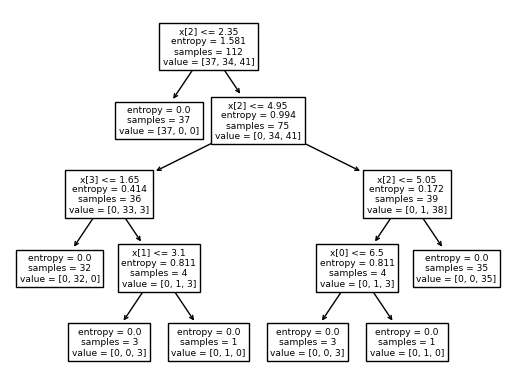

In [13]:
# Visualize the decision tree 
plot_tree(tree_clf)

In [11]:
!pip install dtreeviz

In [14]:
from dtreeviz.trees import dtreeviz
viz = dtreeviz(tree_clf, 
               X_train,
               y_train,
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"],
               scale=2,
               orientation='LR'

               )
viz

ImportError: cannot import name 'dtreeviz' from 'dtreeviz.trees' (C:\Users\40723\anaconda3\envs\aiclasses\Lib\site-packages\dtreeviz\trees.py)

In [ ]:
!pip list

In [15]:
# Define the hyperparameters to search over 
param_grid = {"max_depth": [1, 2, 3, 4, 5, 6, 7]} 
# Create a grid search object 
grid_search = GridSearchCV(tree_clf, param_grid, cv=5) 
# Fit the grid search object to the training data 
grid_search.fit(X_train, y_train) 
# Print the best hyperparameters found by the grid search 
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 3}


In [17]:
# Create a new decision tree classifier object with the best hyperparameters 
tree_clf_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42) 
# Fit the classifier to the training data 
tree_clf_tuned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.35\nentropy = 1.581\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.95\nentropy = 0.994\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.414\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.172\nsamples = 39\nvalue = [0, 1, 38]')]

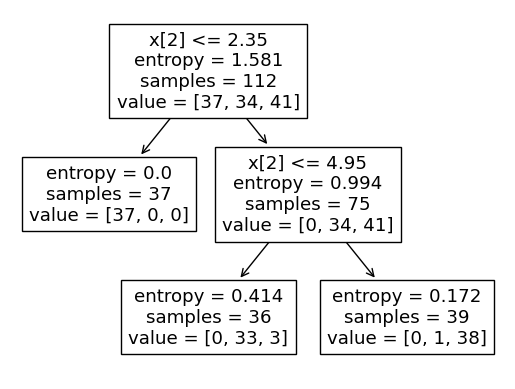

In [18]:
# Visualize the decision tree 
plot_tree(tree_clf_tuned)

In [19]:
df_clean_iris_set = x.copy()
df_clean_iris_set['iris_name']=y
df_clean_iris_set.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


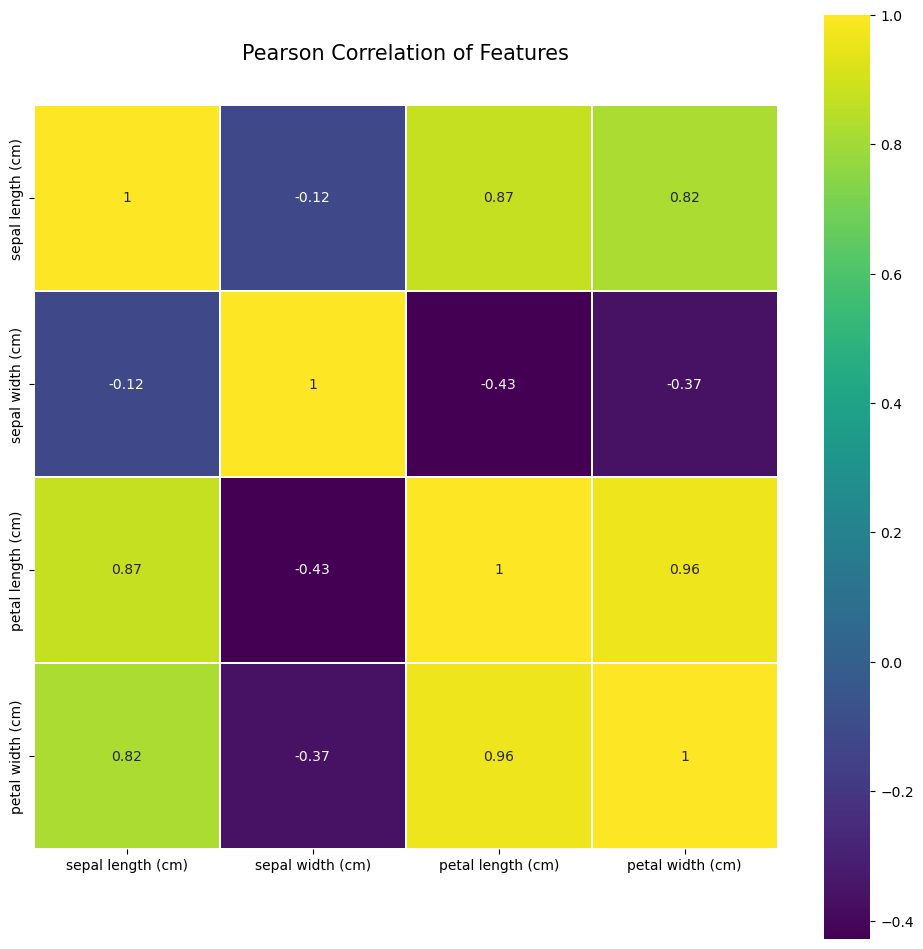

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = df_clean_iris_set.select_dtypes(include=['float64', 'int64']).columns

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_clean_iris_set[numeric_cols].corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()


Modified Dataset After Dropping 'petal width (cm)':
     sepal length (cm)  sepal width (cm)  petal length (cm)  iris_name
0                  5.1               3.5                1.4     setosa
1                  4.9               3.0                1.4     setosa
2                  4.7               3.2                1.3     setosa
3                  4.6               3.1                1.5     setosa
4                  5.0               3.6                1.4     setosa
..                 ...               ...                ...        ...
148                6.7               3.0                5.2  virginica
149                6.3               2.5                5.0  virginica
150                6.5               3.0                5.2  virginica
151                6.2               3.4                5.4  virginica
152                5.9               3.0                5.1  virginica

[150 rows x 4 columns]
Accuracy: 0.95
Best hyperparameters: {'max_depth': 2}


DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

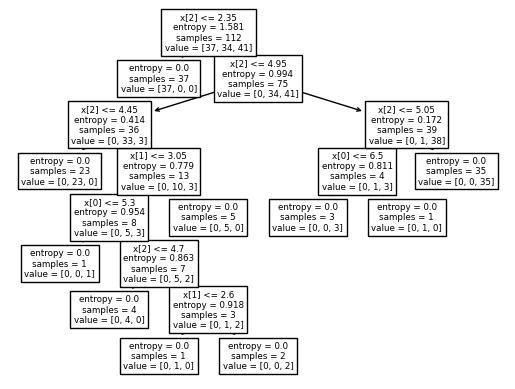

In [1]:
#Drop the petal width column from the database and create a decision tree in a similar way with the example.

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

df_iris_ex = pd.read_csv("iris_teach_2.csv")
df_iris_ex.dropna(inplace=True)
df_iris_ex.drop(columns=['petal width (cm)'], inplace=True)
print("Modified Dataset After Dropping 'petal width (cm)':")
print(df_iris_ex)

x = df_iris_ex[["sepal length (cm)", "sepal width (cm)", "petal length (cm)"]]
y = df_iris_ex["iris_name"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.25, random_state=0)

tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

plot_tree(tree_clf)




Best hyperparameters: {'max_depth': 2}


[Text(0.4, 0.8333333333333334, 'x[2] <= 2.35\nentropy = 1.581\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.95\nentropy = 0.994\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.414\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.172\nsamples = 39\nvalue = [0, 1, 38]')]

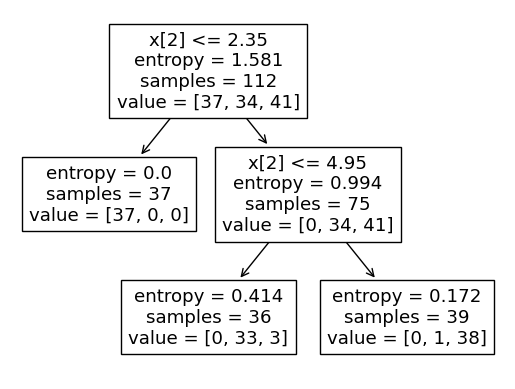

In [2]:
#Find the proper depth and evaluate the score for the decision tree model that you build.
param_grid = {"max_depth": [1, 2, 3, 4, 5, 6, 7]}
grid_search = GridSearchCV(tree_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)

tree_clf_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=grid_search.best_params_['max_depth'], random_state=42)
tree_clf_tuned.fit(X_train, y_train)

plot_tree(tree_clf_tuned)